Nama : Nadila Nur Sholekah

NRP : 5026211041

Kelas : DLH C

#**Import Library**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Association Rule

In [23]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#import data
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path = "/content/drive/MyDrive/DLH/" # > COPY PATH from your project FOLDER on GDrive & add '/' in the end
                                                                      # > save this PATH Variable, in case we need to import another file from this Folder

on_retail = pd.read_csv(path + "Online_Retail.csv")
on_retail

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [26]:
# Menampilkan seberapa sering setiap nilai muncul dalam kolom 'Description'
des_counts = on_retail['Country'].value_counts()
print(des_counts)

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
on_retail['Description']= on_retail ['Description'].str.strip()
on_retail.dropna(axis=0, subset = ['InvoiceNo'], inplace =True)
on_retail['InvoiceNo'] =on_retail ['InvoiceNo'].astype('str')
#baris-baris yang memiliki karakter 'C' dalam 'InvoiceNo' akan dihapus dari DataFrame asr.
on_retail = on_retail [~on_retail['InvoiceNo'].str.contains('C')]
on_retail

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [28]:
#hanya memilih transaksi yang ada di negara France
asr = (on_retail[on_retail['Country']=="France"]
 # group berdasarkan invoice no dan description untuk menghitung quantity total di setiap invoice no
.groupby(['InvoiceNo','Description'])['Quantity'].sum()
  #kemudian akan dilakukan perubahan shape sehingga index ke 2 akan menjadi sebuah kolom
.unstack().reset_index().fillna(0)
#mengeset index nya adalah invoice no sehingga 1 baris akan memiliki 1 invoice no
.set_index ('InvoiceNo'))

asr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
def encode_units(x):
        if x <= 0:
            return 0
        if x >= 1:
            return 1
# Menggunakan fungsi encode_units pada setiap elemen DataFrame asr
asr_sets = asr.applymap(encode_units)

# Menghapus kolom 'POSTAGE' dari DataFrame
asr_sets .drop('POSTAGE', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
freq_itemsets = apriori(asr_sets,min_support=0.065, use_colnames=True)
rules = association_rules(freq_itemsets, metric='lift', min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190,0.943878
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273,0.917139
8,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.125000,0.153061,0.066327,0.530612,3.466667,0.047194,1.804348,0.813187
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG APPLE DESIGN),0.153061,0.125000,0.066327,0.433333,3.466667,0.047194,1.544118,0.840130


In [31]:
rules[(rules['lift']>= 5)&
      (rules['confidence'] >= 0.8)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
21,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
22,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
23,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
30,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959,0.967949
31,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850,0.953488
32,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796,0.956294


##**Kesimpulan**

Pada toko yang berada pada Cabang France, Jika pelanggan membeli ALARM CLOCK BAKELIKE GREEN maka kemungkinan 81% juga akan membeli ALARM CLOCK BAKELIKE RED. Peluang penjualan ALARM CLOCK BAKELIKE RED meningkat 5 kali lipat jika pelanggan telah membeli ALARM CLOCK BAKELIKE GREEN dibandingkan dengan peluang pembelian  ALARM CLOCK BAKELIKE RED secara keseluruhan. Hal ini menunjukkan bahwa terdapat hubungan yang erat antara pembelian kedua produk tersebut, dimana penjualan ALARM CLOCK BAKELIKE GREEN kepada pelanggan dapat digunakan sebagai strategi penjualan untuk produk ALARM CLOCK BAKELIKE RED.

#**Praproses Data**

In [32]:
#import data
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
path = "/content/drive/MyDrive/DLH/" # > COPY PATH from your project FOLDER on GDrive & add '/' in the end
                                                                      # > save this PATH Variable, in case we need to import another file from this Folder

heart_attack = pd.read_csv(path + "heart_attack_prediction_dataset.csv")
heart_attack

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [34]:
heart_attack.describe(include = 'all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763,8763,8763,8763.000000
unique,8763,NaN,2,NaN,3915,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,6,2,NaN
top,BMW7812,NaN,Male,NaN,146/94,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Asia,Northern Hemisphere,NaN
freq,1,NaN,6111,NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,477,2543,5660,NaN
mean,NaN,53.707977,NaN,259.877211,NaN,75.021682,0.652288,0.492982,0.896839,0.501426,...,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,NaN,NaN,NaN,0.358211
std,NaN,21.249509,NaN,80.863276,NaN,20.550948,0.476271,0.499979,0.304186,0.500026,...,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,NaN,NaN,NaN,0.479502
min,NaN,18.000000,NaN,120.000000,NaN,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,NaN,NaN,NaN,0.000000
25%,NaN,35.000000,NaN,192.000000,NaN,57.000000,0.000000,0.000000,1.000000,0.000000,...,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,NaN,NaN,NaN,0.000000
50%,NaN,54.000000,NaN,259.000000,NaN,75.000000,1.000000,0.000000,1.000000,1.000000,...,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,NaN,NaN,NaN,0.000000
75%,NaN,72.000000,NaN,330.000000,NaN,93.000000,1.000000,1.000000,1.000000,1.000000,...,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,NaN,NaN,NaN,1.000000


##Cek Misingvalue

In [35]:
heart_attack.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [36]:
# Cek apakah terdapat baris yang kosong
heart_attack.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [37]:
#melakukan pengecekan apakah terdapat baris duplikat
heart_attack.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

##Pengecekan Outlier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


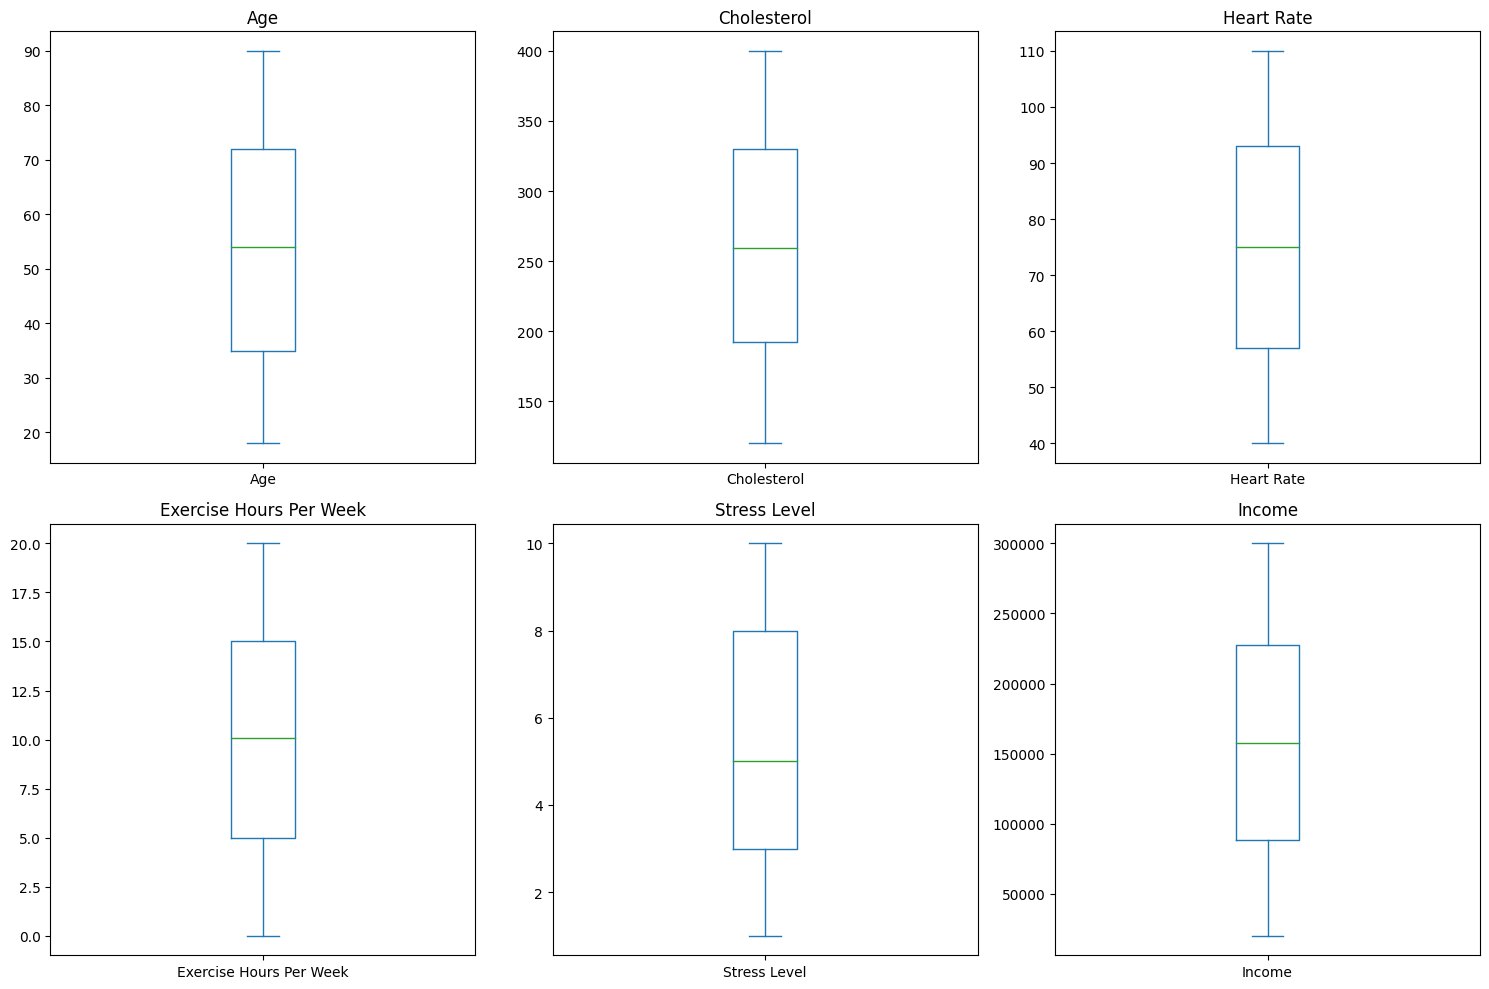

In [38]:
ratio_data = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Income']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Menentukan subplot yang sesuai
    row = i // 3
    col = i % 3

    # Membuat boxplot dalam subplot
    heart_attack[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


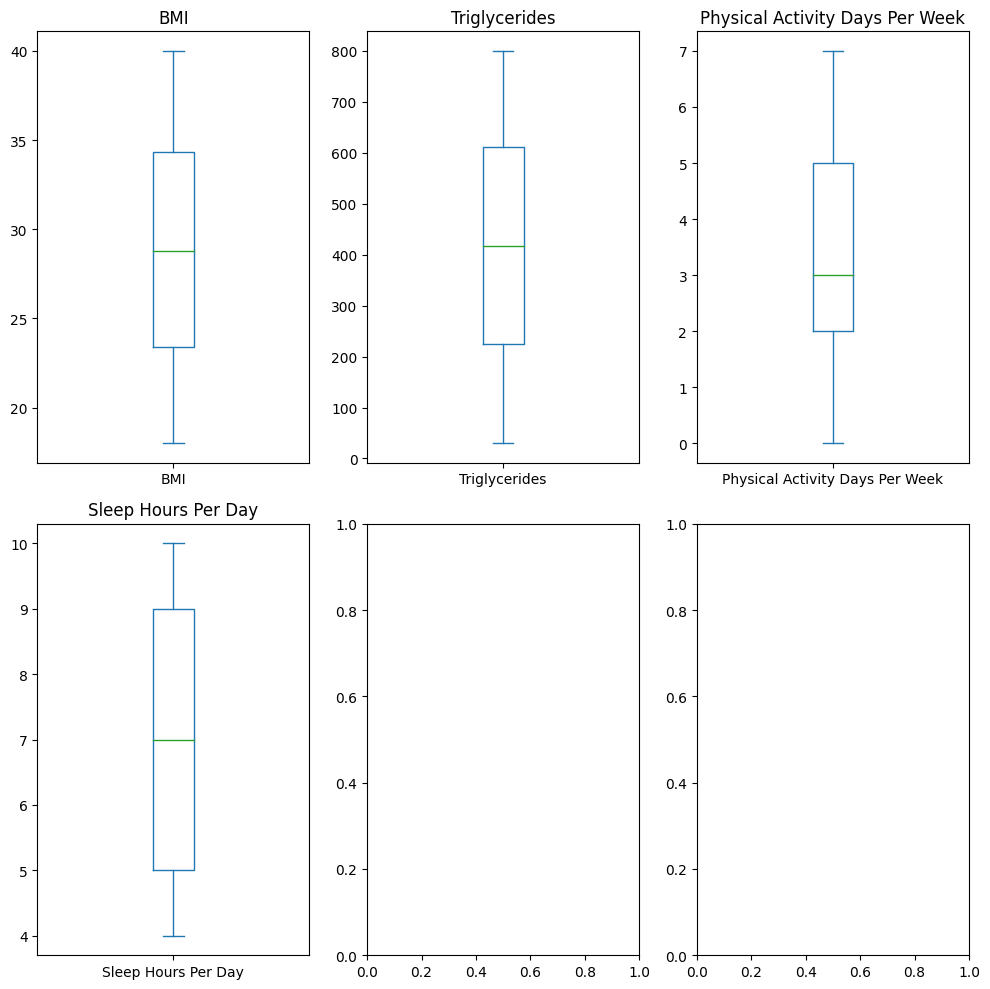

In [39]:
ratio_data = ['BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day' ]

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Menentukan subplot yang sesuai
    row = i // 3
    col = i % 3

    # Membuat boxplot dalam subplot
    heart_attack[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()

##Pisah Kolom Blood Pressure

In [40]:
# Memisahkan kolom "Ratio" menjadi dua kolom baru
split_data = heart_attack['Blood Pressure'].str.split('/', expand=True)
heart_attack.insert(loc=heart_attack.columns.get_loc('Blood Pressure'), column='Siskotik Pressure', value=split_data[0])
heart_attack.insert(loc=heart_attack.columns.get_loc('Blood Pressure') + 1, column='Diastolik Pressure', value=split_data[1])

# Drop kolom awal "Ratio"
heart_attack=drop = heart_attack.drop(columns=['Blood Pressure'])

heart_attack

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Siskotik Pressure,Diastolik Pressure,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158,88,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165,93,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174,99,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163,100,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91,88,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94,76,61,1,1,1,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157,102,73,1,0,0,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161,75,105,0,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119,67,60,1,0,1,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [41]:
heart_attack['Siskotik Pressure'] = pd.to_numeric(heart_attack['Siskotik Pressure'], errors='coerce')
heart_attack['Diastolik Pressure'] = pd.to_numeric(heart_attack['Diastolik Pressure'], errors='coerce')
heart_attack['Sleep Hours Per Day'] = heart_attack['Sleep Hours Per Day'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Drop Kolom

In [42]:
heart_attack_drop = heart_attack.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere' ])
heart_attack_drop.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,Cholesterol,Siskotik Pressure,Diastolik Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165,93,98,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174,99,72,1,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163,100,73,1,1,1,0,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91,88,93,1,1,1,1,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


##Pengecekan value pada data kategorikal

In [43]:
heart_attack_drop['Sex'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Male      6111
Female    2652
Name: Sex, dtype: int64

In [44]:
heart_attack_drop['Diet'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64

##Melakukan Encoding

In [45]:
heart_attack_drop = heart_attack_drop.replace(
    {'Sex' : {
        'Male': 1,
        'Female': 2}})
heart_attack_drop = heart_attack_drop.replace(
    {'Diet' : {
        'Healthy': 1,
        'Average': 2,
        'Unhealthy' : 0}})
heart_attack_encoded = heart_attack_drop.copy()
cat_columns = ['Sex', 'Diet']
for col in cat_columns:
    heart_attack_encoded[col] = heart_attack_encoded[col].astype('category').cat.codes

heart_attack_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,Cholesterol,Siskotik Pressure,Diastolik Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,0,208,158,88,72,0,0,1,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,0,389,165,93,98,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,1,324,174,99,72,1,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,0,383,163,100,73,1,1,1,0,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,0,318,91,88,93,1,1,1,1,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


##Korelasi antar kolom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


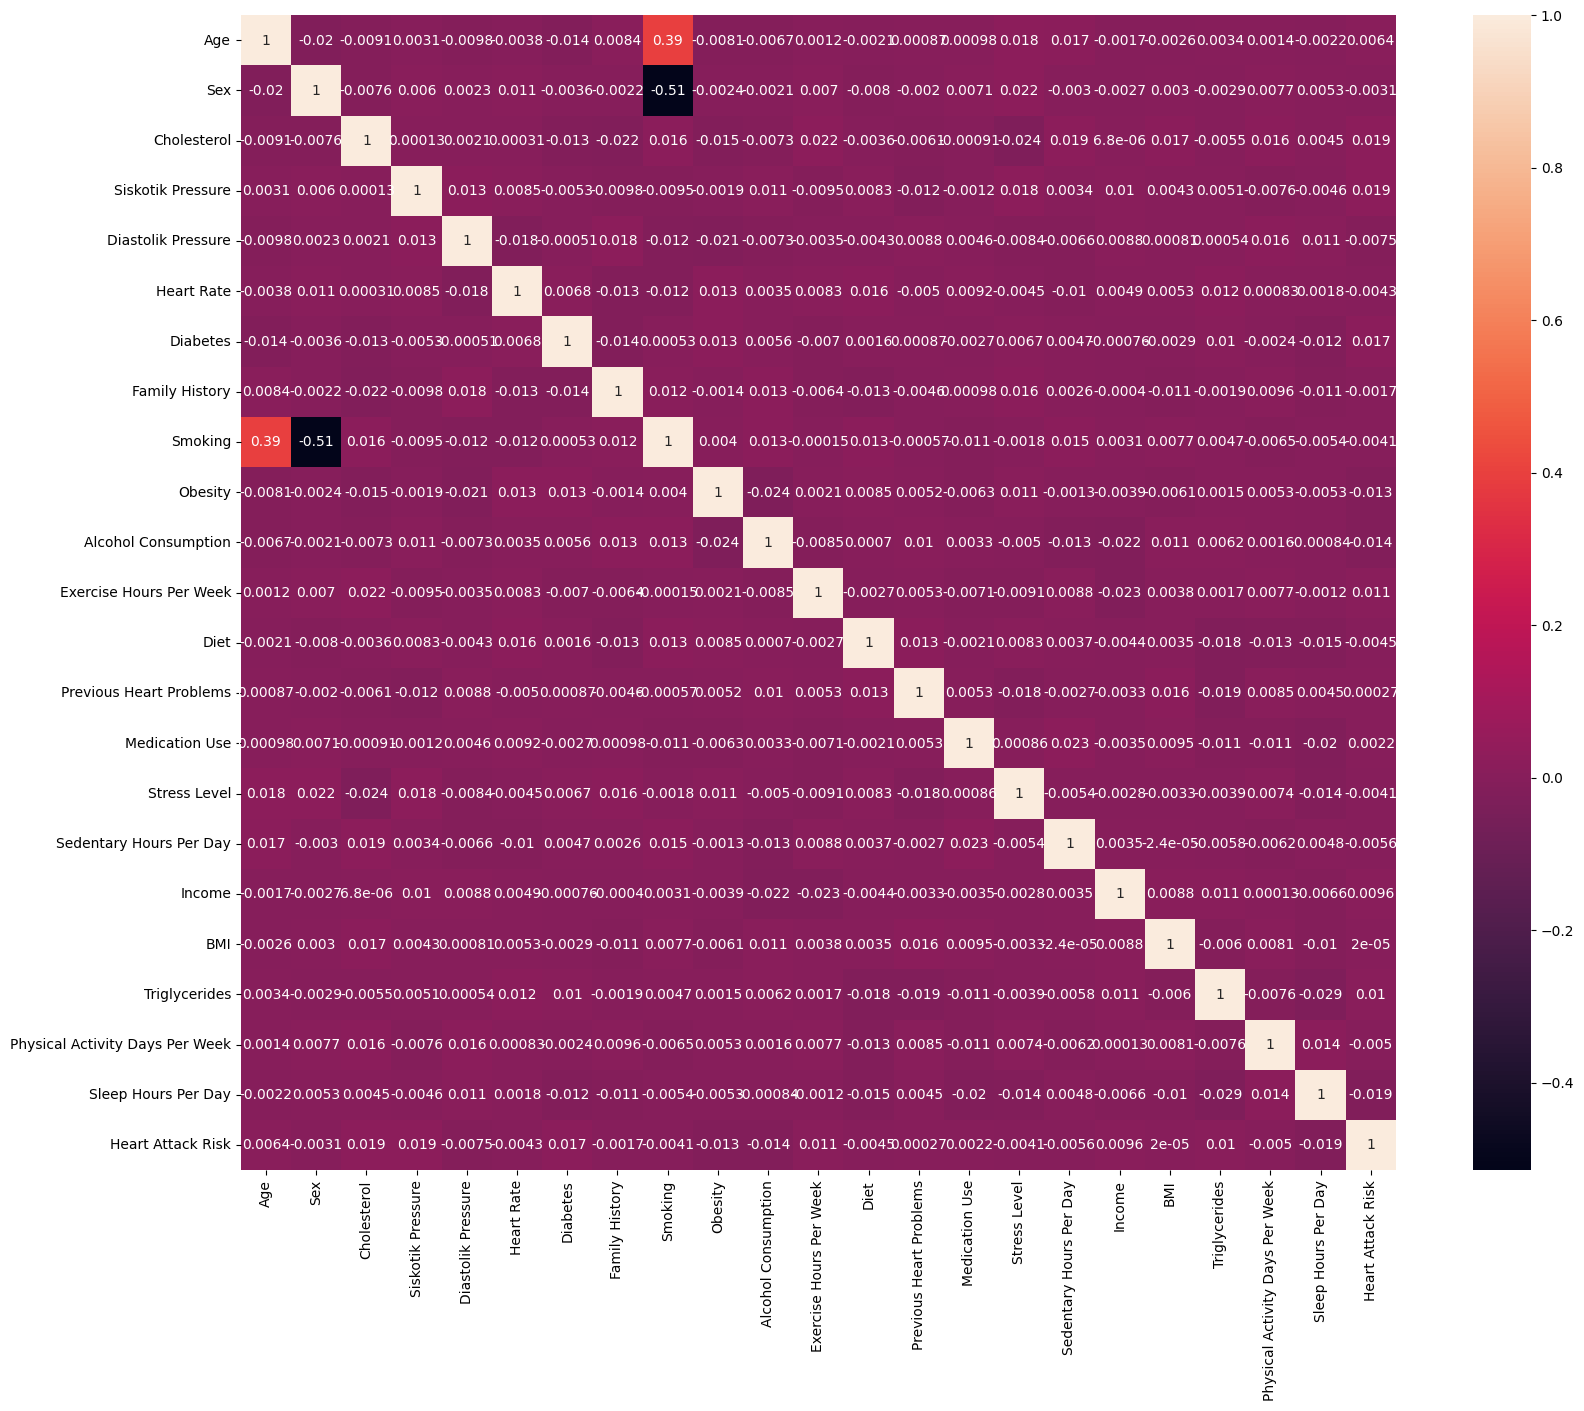

In [46]:
corrmat = heart_attack_drop.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, square=True, annot=True);

#Klaster

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.10/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/us

In [48]:
#Pilih Variabel yang dipilih sebagai indikator kluster
#variabel yang dipilih = Choresterol, Heart Attack Risk, dan Obesity
selected_variables = ['Obesity', 'Cholesterol', 'Heart Attack Risk']
X_selected = heart_attack_drop[selected_variables]

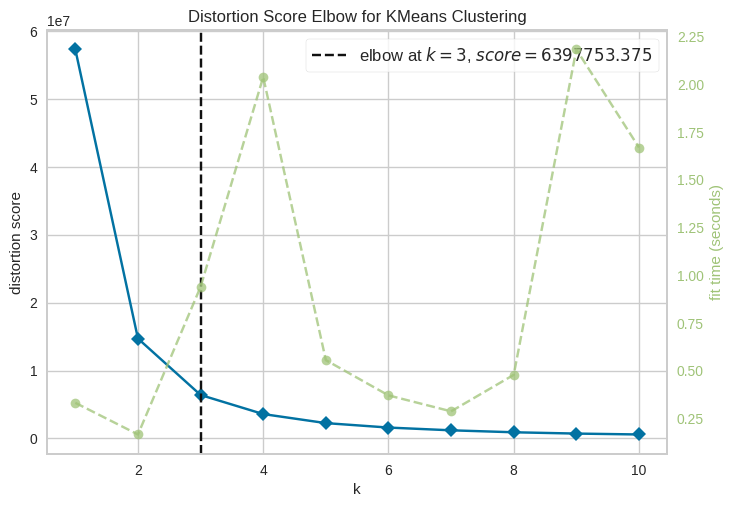

In [49]:
kmeans = KMeans(random_state = 0)
model = KElbowVisualizer(kmeans, k = (1, 11))
model.fit(X_selected)
model.show();

Pada k = 2, nilai distorsi siku masih cukup tinggi. Hal ini menunjukkan bahwa data belum dikelompokkan dengan baik menjadi dua cluster.

Pada k = 3, nilai distorsi siku mencapai titik terendah. Hal ini menunjukkan bahwa data telah dikelompokkan dengan baik menjadi tiga cluster.

Pada k = 4, nilai distorsi siku mulai meningkat. Hal ini menunjukkan bahwa data mulai dikelompokkan terlalu berlebihan menjadi empat cluster.

Pada k = 5 ke atas, nilai distorsi siku terus meningkat. Hal ini menunjukkan bahwa data semakin dikelompokkan terlalu berlebihan.

Dengan demikian, **k = 3 adalah jumlah cluster yang optimal untuk data tersebut.**

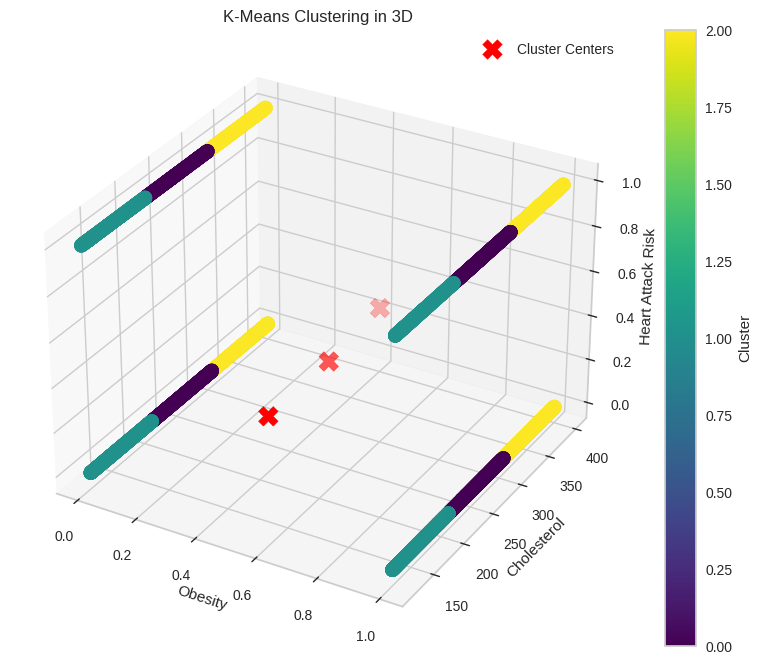

In [50]:
# Menggunakan K-Means dengan 3 kluster
kmeans_selected = KMeans(n_clusters=3, random_state=0)
heart_attack_drop['Cluster_Selected'] = kmeans_selected.fit_predict(X_selected)

# Visualisasi hasil klustering dalam 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data sebaran dengan warna berdasarkan kluster
scatter = ax.scatter(xs=heart_attack_drop['Obesity'], ys=heart_attack_drop['Cholesterol'], zs=heart_attack_drop['Heart Attack Risk'], c=heart_attack_drop['Cluster_Selected'], cmap='viridis', s=100)

# Plot pusat kluster
centers = kmeans_selected.cluster_centers_
ax.scatter(xs=centers[:, 0], ys=centers[:, 1], zs=centers[:, 2], marker='X', s=200, color='red', label='Cluster Centers')

ax.set_xlabel('Obesity')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Heart Attack Risk')
ax.set_title('K-Means Clustering in 3D')
ax.legend()

# Menambahkan colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


In [51]:
# Define the parameter grid
param_grid = {
    'eps': [0.1, 0.5, 1, 10],
    'min_samples': [2, 4, 6, 8]
}

# Create a DBSCAN instance
dbscan = DBSCAN()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_selected)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'eps': 0.1, 'min_samples': 2}


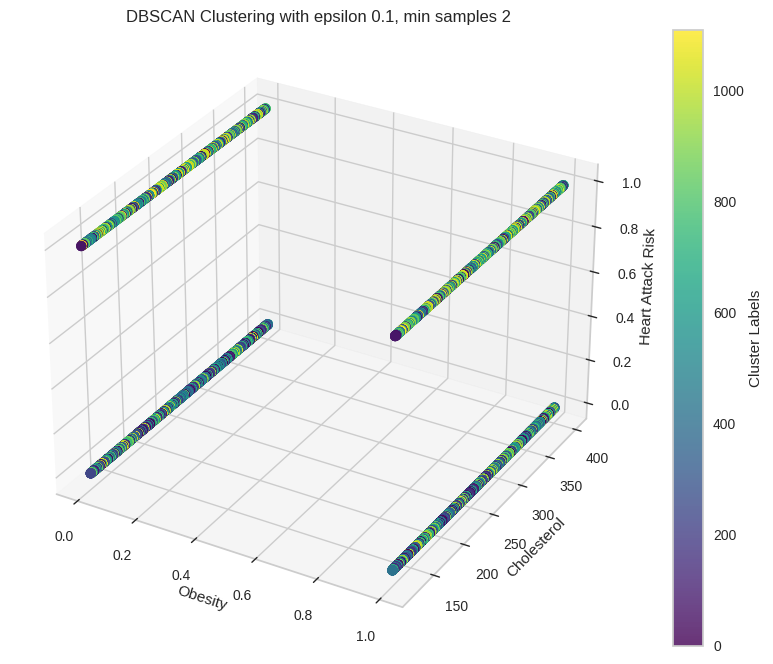

In [52]:
# Apply DBSCAN clustering
db = DBSCAN(eps=0.1, min_samples=2).fit(X_selected)

# Add cluster labels to the DataFrame
X_selected['Labels'] = db.labels_

# Plot the results with 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_selected['Obesity'], X_selected['Cholesterol'], X_selected['Heart Attack Risk'],
                     c=X_selected['Labels'], cmap='viridis', s=50, alpha=0.8)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Cluster Labels')

ax.set_xlabel('Obesity')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Heart Attack Risk')
ax.set_title('DBSCAN Clustering with epsilon 0.1, min samples 2')

plt.show()

Berikut adalah penjelasan lebih rinci tentang masing-masing cluster:

Cluster 1 : Cluster ini berisi data pasien dengan risiko serangan jantung yang tinggi. Pasien-pasien dalam cluster ini memiliki tingkat obesitas yang tinggi, kolesterol yang tinggi, dan risiko serangan jantung yang tinggi.

Cluster 2 : Cluster ini berisi data pasien dengan risiko serangan jantung yang sedang. Pasien-pasien dalam cluster ini memiliki tingkat obesitas dan kolesterol yang sedang, serta risiko serangan jantung yang sedang.

Cluster 3 : Cluster ini berisi data pasien dengan risiko serangan jantung yang rendah. Pasien-pasien dalam cluster ini memiliki tingkat obesitas dan kolesterol yang rendah, serta risiko serangan jantung yang rendah.

Berdasarkan hasil pengelompokan tersebut, dapat disimpulkan bahwa obesitas dan kolesterol merupakan faktor-faktor yang berpengaruh terhadap risiko serangan jantung. Pasien dengan tingkat obesitas dan kolesterol yang tinggi memiliki risiko serangan jantung yang lebih tinggi.

#Klasifikasi

##Data Balancing

In [53]:
heart_attack_drop['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [54]:
X = heart_attack_drop.drop('Heart Attack Risk', axis=1)
y = heart_attack_drop['Heart Attack Risk']

In [55]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

0    5624
1    5624
Name: Heart Attack Risk, dtype: int64

##Data Splitting

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=123, stratify=y_balanced)

##Feature Scaling

In [57]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              11248 non-null  int64  
 1   Sex                              11248 non-null  int64  
 2   Cholesterol                      11248 non-null  int64  
 3   Siskotik Pressure                11248 non-null  int64  
 4   Diastolik Pressure               11248 non-null  int64  
 5   Heart Rate                       11248 non-null  int64  
 6   Diabetes                         11248 non-null  int64  
 7   Family History                   11248 non-null  int64  
 8   Smoking                          11248 non-null  int64  
 9   Obesity                          11248 non-null  int64  
 10  Alcohol Consumption              11248 non-null  int64  
 11  Exercise Hours Per Week          11248 non-null  float64
 12  Diet              

In [58]:
scaler = StandardScaler()

X_train['Age'] = scaler.fit_transform(X_train[['Age']]) # "fit" on the TRAIN set only, then transform
X_test['Age'] = scaler.transform(X_test[['Age']]) # while on the TEST set, just "transform" it

X_train['Sex'] = scaler.fit_transform(X_train[['Sex']])
X_test['Sex'] = scaler.transform(X_test[['Sex']])

X_train['Cholesterol'] = scaler.fit_transform(X_train[['Cholesterol']])
X_test['Cholesterol'] = scaler.transform(X_test[['Cholesterol']])

X_train['Siskotik Pressure'] = scaler.fit_transform(X_train[['Siskotik Pressure']])
X_test['Siskotik Pressure'] = scaler.transform(X_test[['Siskotik Pressure']])

X_train['Diastolik Pressure'] = scaler.fit_transform(X_train[['Diastolik Pressure']])
X_test['Diastolik Pressure'] = scaler.transform(X_test[['Diastolik Pressure']])

X_train['Heart Rate'] = scaler.fit_transform(X_train[['Heart Rate']])
X_test['Heart Rate'] = scaler.transform(X_test[['Heart Rate']])

X_train['Diabetes'] = scaler.fit_transform(X_train[['Diabetes']])
X_test['Diabetes'] = scaler.transform(X_test[['Diabetes']])

X_train['Family History'] = scaler.fit_transform(X_train[['Family History']])
X_test['Family History'] = scaler.transform(X_test[['Family History']])

X_train['Smoking'] = scaler.fit_transform(X_train[['Smoking']])
X_test['Smoking'] = scaler.transform(X_test[['Smoking']])

X_train['Obesity'] = scaler.fit_transform(X_train[['Obesity']])
X_test['Obesity'] = scaler.transform(X_test[['Obesity']])

X_train['Alcohol Consumption'] = scaler.fit_transform(X_train[['Alcohol Consumption']])
X_test['Alcohol Consumption'] = scaler.transform(X_test[['Alcohol Consumption']])

X_train['Exercise Hours Per Week'] = scaler.fit_transform(X_train[['Exercise Hours Per Week']])
X_test['Exercise Hours Per Week'] = scaler.transform(X_test[['Exercise Hours Per Week']])

X_train['Diet'] = scaler.fit_transform(X_train[['Diet']])
X_test['Diet'] = scaler.transform(X_test[['Diet']])

X_train['Previous Heart Problems'] = scaler.fit_transform(X_train[['Previous Heart Problems']])
X_test['Previous Heart Problems'] = scaler.transform(X_test[['Previous Heart Problems']])

X_train['Medication Use'] = scaler.fit_transform(X_train[['Medication Use']])
X_test['Medication Use'] = scaler.transform(X_test[['Medication Use']])

X_train['Stress Level'] = scaler.fit_transform(X_train[['Stress Level']])
X_test['Stress Level'] = scaler.transform(X_test[['Stress Level']])

X_train['Sedentary Hours Per Day'] = scaler.fit_transform(X_train[['Sedentary Hours Per Day']])
X_test['Sedentary Hours Per Day'] = scaler.transform(X_test[['Sedentary Hours Per Day']])

X_train['Income'] = scaler.fit_transform(X_train[['Income']])
X_test['Income'] = scaler.transform(X_test[['Income']])

X_train['BMI'] = scaler.fit_transform(X_train[['BMI']])
X_test['BMI'] = scaler.transform(X_test[['BMI']])

X_train['Triglycerides'] = scaler.fit_transform(X_train[['Triglycerides']])
X_test['Triglycerides'] = scaler.transform(X_test[['Triglycerides']])

X_train['Physical Activity Days Per Week'] = scaler.fit_transform(X_train[['Physical Activity Days Per Week']])
X_test['Physical Activity Days Per Week'] = scaler.transform(X_test[['Physical Activity Days Per Week']])

X_train['Sleep Hours Per Day'] = scaler.fit_transform(X_train[['Sleep Hours Per Day']])
X_test['Sleep Hours Per Day'] = scaler.transform(X_test[['Sleep Hours Per Day']])

X_train.describe()

,Age,Sex,Cholesterol,Siskotik Pressure,Diastolik Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Cluster_Selected
count,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,...,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7.873000e+03,7873.000000
mean,-1.606460e-16,-2.888018e-17,-2.978269e-16,-2.202114e-16,2.238214e-16,2.906068e-16,-1.547797e-16,1.083007e-17,2.035150e-16,1.335708e-16,...,1.407909e-16,-1.092032e-16,-1.601948e-16,1.606460e-16,-1.786961e-16,2.450303e-16,4.512528e-17,6.678542e-17,-3.384396e-17,0.979804
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,...,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,0.824069
min,-1.686207e+00,-6.513095e-01,-1.747589e+00,-1.702002e+00,-1.713738e+00,-1.703197e+00,-1.376403e+00,-9.827476e-01,-2.965179e+00,-9.963233e-01,...,-1.001144e+00,-1.004711e+00,-1.566426e+00,-1.727793e+00,-1.722943e+00,-1.744779e+00,-1.727743e+00,-1.521220e+00,-1.508120e+00,0.000000
25%,-8.888512e-01,-6.513095e-01,-8.548458e-01,-8.659712e-01,-8.980437e-01,-8.796329e-01,-1.376403e+00,-9.827476e-01,3.372477e-01,-9.963233e-01,...,-1.001144e+00,-1.004711e+00,-8.683548e-01,-8.564069e-01,-8.658335e-01,-8.639921e-01,-8.670114e-01,-1.085344e+00,-1.005520e+00,0.000000
50%,2.311505e-03,-6.513095e-01,6.992565e-04,-2.994063e-02,-1.437540e-02,-7.623941e-03,7.265314e-01,-9.827476e-01,3.372477e-01,-9.963233e-01,...,9.988575e-01,9.953114e-01,-1.702839e-01,-2.052864e-02,-3.469371e-03,-2.284842e-02,1.146693e-02,-2.135920e-01,-3.191923e-04,1.000000
75%,8.934742e-01,1.535368e+00,8.562444e-01,8.820927e-01,8.692929e-01,8.643851e-01,7.265314e-01,1.017555e+00,3.372477e-01,1.003690e+00,...,9.988575e-01,9.953114e-01,8.768225e-01,8.689607e-01,8.554291e-01,8.644783e-01,8.677615e-01,1.094036e+00,1.004881e+00,2.000000
max,1.690830e+00,1.535368e+00,1.724189e+00,1.718123e+00,1.684987e+00,1.687949e+00,7.265314e-01,1.017555e+00,3.372477e-01,1.003690e+00,...,9.988575e-01,9.953114e-01,1.574893e+00,1.720035e+00,1.778912e+00,1.759588e+00,1.688562e+00,1.529912e+00,1.507481e+00,2.000000


##Model Klasifikasi

###Naive Bayes

In [59]:
#algoritma
classifier=GaussianNB()
#training
classifier.fit(X_train,y_train)

#evaluasi
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.5054814814814815


In [60]:
# Jika memakai cross validation 10 fold
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.513274401924677

###Logistic Regression

In [61]:
param_distributions = {
     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Variasi parameter C
     'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Variasi solver
 }

# Membuat objek model Regresi Logistik
logreg = LogisticRegression(random_state=123)

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_distributions, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan parameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter terbaik: {'solver': 'newton-cg', 'C': 0.001}


In [62]:
classifier = LogisticRegression(C=0.01, solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.5007407407407407


In [63]:
#cross validation 10 fold
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.5122575610007806

###Random Forest

In [64]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split = 20, min_samples_leaf = 8, max_depth = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      1688
           1       0.62      0.66      0.64      1687

    accuracy                           0.63      3375
   macro avg       0.63      0.63      0.63      3375
weighted avg       0.63      0.63      0.63      3375



In [65]:
#cross validation
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
categorical_features = ['Sex', 'Diet']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, min_samples_split = 20, min_samples_leaf = 8, max_depth = 10))])
# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=strat_kfold)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)


Hasil Akurasi validasi silang:
[0.64310148 0.64196123 0.64196123 0.64155251 0.64155251 0.64155251
 0.64041096 0.64041096 0.64155251 0.64155251]


###KNN

In [66]:
# Definisikan model k-NN
knn_classifier = KNeighborsClassifier()

# Menentukan ruang parameter yang akan dijelajahi
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']}
# Inisialisasi Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# melakukan pencarian parameter terbaik pada data latih
grid_search.fit(X_train, y_train)

# Parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [67]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean', weights = 'distance')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.669037037037037


In [68]:
#cross validation
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
categorical_features = ['Sex', 'Diet']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5, weights ='distance'))])
# initialize Stratified KFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.55302166 0.55416192 0.57468643 0.57191781 0.56621005 0.57762557
 0.57077626 0.56621005 0.55251142 0.55707763]


###Decission Tree

In [69]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier()

# Definisikan kumpulan parameter yang akan diuji
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Grid Search dengan model dan parameter grid
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Latih Grid Search pada data pelatihan
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [70]:
classifier=DecisionTreeClassifier(min_samples_leaf= 1, max_depth= None, min_samples_split =2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.6782222222222222


In [71]:
#cross validation
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
categorical_features = ['Sex', 'Diet']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', DecisionTreeClassifier(min_samples_leaf= 1, max_depth= None, min_samples_split =2))])
# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=strat_kfold)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.55758267 0.56328392 0.54161916 0.52853881 0.5673516  0.56278539
 0.54794521 0.55821918 0.56050228 0.53767123]


In [72]:
#classification report
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      1688
           1       0.65      0.77      0.71      1687

    accuracy                           0.68      3375
   macro avg       0.69      0.68      0.68      3375
weighted avg       0.69      0.68      0.68      3375



###SVM

In [ ]:
#cross validation
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
categorical_features = ['Sex', 'Diet']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', SVC(kernel='linear'))])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.64196123 0.64196123 0.64196123 0.64269406 0.64155251 0.64155251
 0.64155251 0.64155251 0.64155251 0.64155251]
